<a href="https://colab.research.google.com/github/HalcyonForest/CreditFraudDetection/blob/main/TinkoffLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import xgboost as xgb
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM, Dropout
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling1D
from keras.layers import InputLayer, Conv1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

X = df.drop(columns=['Class'])
y = df['Class']

Frauds = df['Class'].value_counts()[1]
NonFrauds = df['Class'].value_counts()[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify=y, random_state=42)
#X_test = X_test.drop(columns=['Class'])

X_val, _1, y_val, _2 = train_test_split(X_train, y_train, train_size = 0.2, stratify=y_train, random_state=42)

weight_for_0 = 1 / NonFrauds
weight_for_1 = 1 / Frauds
class_weight = {0: weight_for_0, 1: weight_for_1} # строчка из документации Keras

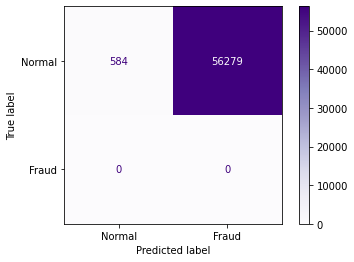

In [ ]:
y_svm_oc = svm_oc.predict(X_oc_test)
y_svm_oc[y_svm_oc == -1] = 0
y_svm_oc[y_svm_oc == 1] = 1

#svm_oc_accuracy = sklearn.metrics.accuracy_score(y_test,y_svm_oc)
#print(svm_oc_accuracy)
svm_oc_cm = confusion_matrix(y_oc_test, y_svm_oc)
matrix = ConfusionMatrixDisplay(svm_oc_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

Accuracy не является информативной метрикой из-за дизбаланса классов.

Цель: похожесть confusion matrix с теми, что в статье.

Главная метрика: TrueNegative (кол-во отловленных подозрительных операций). + Низкий FalsePostive 

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#Naive accuracy
y_naive = [0] * len(df['Class'])
NaiveScore = sklearn.metrics.accuracy_score(df['Class'], y_naive)
print(NaiveScore)

0.9982725143693799


In [ ]:
sklearn.metrics.confusion_matrix(df['Class'], y_naive)

array([[284315,      0],
       [   492,      0]])

In [ ]:
# scaler = StandardScaler()
# X_train[['scaledAmount']] = scaler.fit_transform(X_train[['Amount']])
# X_test[['scaledAmount']] = scaler.transform(X_test[['Amount']])


In [ ]:
#X_train = X_train.drop(columns=['Class'])

In [ ]:
# # Подглядел на kaggle
# fraud_df = df.loc[df['Class'] == 1]
# nonfraud_df = df.loc[df['Class'] == 0][:492]
# normal_dist_df = pd.concat([fraud_df, nonfraud_df])
# normal_dist_df = normal_dist_df.drop(columns=['Class'])

In [ ]:
fraud_train = X_train.loc[X_train['Class'] == 1]
nonfraud_train = X_train.loc[X_train['Class'] == 0]
y_train_fraud = X_train.loc[X_train['Class'] == 1, 'Class']
y_train_nonfraud = X_train.loc[X_train['Class'] == 0, 'Class'][:fraud_train.shape[0] * 4]
nonfraud_train = nonfraud_train.drop(columns=['Class'])
fraud_train = fraud_train.drop(columns=['Class'])
nonfraud_train = nonfraud_train[:fraud_train.shape[0] * 4]
y_train = pd.concat([y_train_fraud, y_train_nonfraud])
X_train = pd.concat([nonfraud_train, fraud_train])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,-0.113729,0.510277,0.061258,-0.066555,1.328702,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.323963,1.413095
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,-0.254903,0.325560,-0.405327,0.721068,-0.148445,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.341275,0.624644
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,-0.386845,1.820161,0.747777,0.122746,-1.723285,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346835,-1.129186
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,0.093136,-0.722450,-0.468757,-0.195288,-0.638683,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.328841,0.796203
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,-0.251076,-0.054708,-0.782698,0.134659,-0.483007,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008994,-0.746606


L

In [ ]:
#TO DO разобраться как подавать тензор в нейронку

In [ ]:
# Из документации Keras
metrics = [
    tf.keras.metrics.FalsePositives(name="fp"),
    tf.keras.metrics.TrueNegatives(name="tn"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
]

In [ ]:
y_train.value_counts()

0    1576
1     394
Name: Class, dtype: int64

In [ ]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

In [ ]:
y_val.value_counts()

0    158
1     39
Name: Class, dtype: int64

# DEAL framework: (tensor MLP + ExtraTrees)

In [ ]:
tsr_train = tf.convert_to_tensor(X_train)
tsr_test = tf.convert_to_tensor(X_test)

In [ ]:

model_DEAL = Sequential()
model_DEAL.add(tf.keras.Input(shape=(tsr_train.shape[1])))
model_DEAL.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
model_DEAL.add(Dropout(0.1))
model_DEAL.add(Dense(16, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
model_DEAL.add(Dropout(0.1))
model_DEAL.add(Dense(1, activation='sigmoid'))
model_DEAL.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
model_DEAL.fit(tsr_train, y_train, epochs=10, verbose=1)

Epoch 1/10
7121/7121 [==============================] - 12s 2ms/step - loss: 0.0400 - accuracy: 0.9889
Epoch 2/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0057 - accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 8/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0044 - accuracy: 0.9993
Epoch 9/10
7121/7121 [==============================] - 11s 2ms/step - loss: 0.0046 - accuracy: 0.9994
Epoch 10/10
7121/7121 [==============================] - 11s 2ms/step - l

0.999385555282469


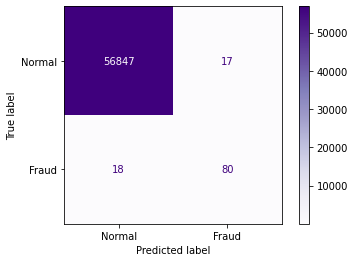

In [ ]:
y_DEAL = model_DEAL.predict(X_test).round()
DEAL_accuracy = sklearn.metrics.accuracy_score(y_test,y_DEAL)
print(DEAL_accuracy)
DEAL_cm = confusion_matrix(y_test, y_DEAL)
matrix = ConfusionMatrixDisplay(DEAL_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

0.9996313331694814


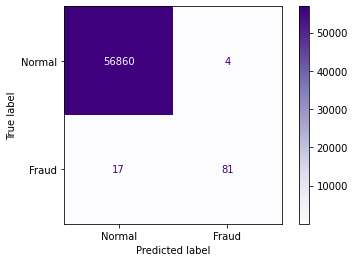

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=400, max_depth= 25, criterion='gini')
etc.fit(X_train, y_train)
y_etc = etc.predict(X_test)
etc_accuracy = sklearn.metrics.accuracy_score(y_test,y_etc)
print(etc_accuracy)
etc_cm = confusion_matrix(y_test, y_etc)
matrix = ConfusionMatrixDisplay(etc_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

In [ ]:
# DEAL Framework matrix
y_mlp = model_DEAL.predict(X_test)
y_ets = etc.predict_proba(X_test)[::,1]
y_ets = np.reshape(y_ets, (-1,1))
y_mlp = np.reshape(y_mlp, (-1,1))
y_ensemble = (y_ets + y_mlp) / 2
y_ensemble = np.reshape(y_ensemble,  (-1,))
y_ensemble = y_ensemble.round()
#print(y_mlp[1], y_ets[1])
#y_ensemble = y_mlp / 2 + y_ets / 2
#y_ensemble = y_ensemble.round()

0.9995962220427653


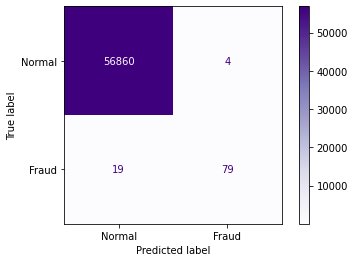

In [ ]:
ensemble_accuracy = sklearn.metrics.accuracy_score(y_test,y_ensemble)
print(ensemble_accuracy)
ensemble_cm = confusion_matrix(y_test, y_ensemble)
matrix = ConfusionMatrixDisplay(ensemble_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

(227845, 30) (56962, 30) (227845,) (56962,) (45569, 30) (45569,)


# CNN

In [ ]:
X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_cnn = np.array(y_train).reshape(y_train.shape[0], 1)
y_test_cnn = np.array(y_test).reshape(y_test.shape[0], 1)

X_val_cnn = np.array(X_val).reshape(X_val.shape[0], X_val.shape[1], 1)
y_val_cnn = np.array(y_val).reshape(y_val.shape[0], 1)

In [ ]:
print(X_train_cnn.shape, X_test_cnn.shape, y_train_cnn.shape, y_test_cnn.shape)

(227845, 30, 1) (56962, 30, 1) (227845, 1) (56962, 1)


In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(16, (2), activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(8, (2), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(16, activation='relu'))
model_cnn.add(Dense(1, activation='softmax'))
model_cnn.compile(optimizer='sgd', loss=tf.keras.losses.binary_crossentropy)
model_cnn.fit(X_train_cnn, y_train, epochs=10, verbose=1, validation_data = (X_val_cnn, y_val))


Epoch 1/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0543 - val_loss: 0.0044
Epoch 2/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 3/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 4/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 5/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 6/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 7/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 8/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 9/10
7121/7121 [==============================] - 17s 2ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 10/10
7121/7121 [==============================] - 17s 2ms/step - l

(56962, 1) (56962, 1)
0.0017204452090867595


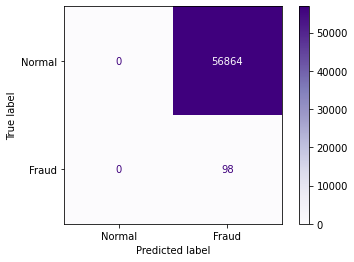

In [ ]:
y_cnn = model_cnn.predict(X_test_cnn)
print(y_cnn.shape, y_test_cnn.shape)
cnn_accuracy = sklearn.metrics.accuracy_score(y_test_cnn,y_cnn)
print(cnn_accuracy)
cnn_cm = confusion_matrix(y_test, y_cnn)
matrix = ConfusionMatrixDisplay(cnn_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

0.9993679997191109


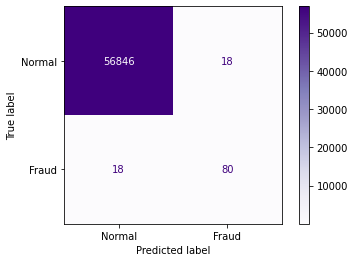

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.05, random_state=1, class_weight=class_weight)
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
lr_accuracy = sklearn.metrics.accuracy_score(y_test,y_lr)
print(lr_accuracy)
lr_cm = confusion_matrix(y_test, y_lr)
matrix = ConfusionMatrixDisplay(lr_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# SVC

0.9992977774656788


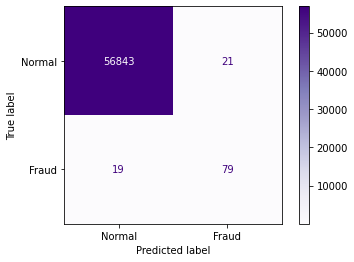

CPU times: user 8min 20s, sys: 1.02 s, total: 8min 21s
Wall time: 8min 20s


In [ ]:
%%time
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#sv = LinearSVC(tol=0.001)
sv = SVC(kernel='linear', gamma='auto', tol=0.0001, verbose = 1)
sv.fit(X_train, y_train)
y_svc = sv.predict(X_test)
svc_accuracy = sklearn.metrics.accuracy_score(y_test,y_svc)
print(svc_accuracy)
svc_cm = confusion_matrix(y_test, y_svc)
matrix = ConfusionMatrixDisplay(svc_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()


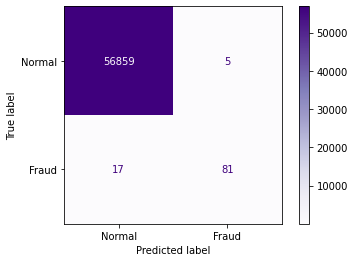

CPU times: user 8min 16s, sys: 533 ms, total: 8min 17s
Wall time: 4min 13s


In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=12, max_features=18, n_jobs=-1)
rfc.fit(X_train, y_train)
y_rfc = rfc.predict(X_test)

rfc_cm = confusion_matrix(y_test, y_rfc)
matrix = ConfusionMatrixDisplay(rfc_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# Пробую решения из других статей

https://arxiv.org/ftp/arxiv/papers/2012/2012.03754.pdf

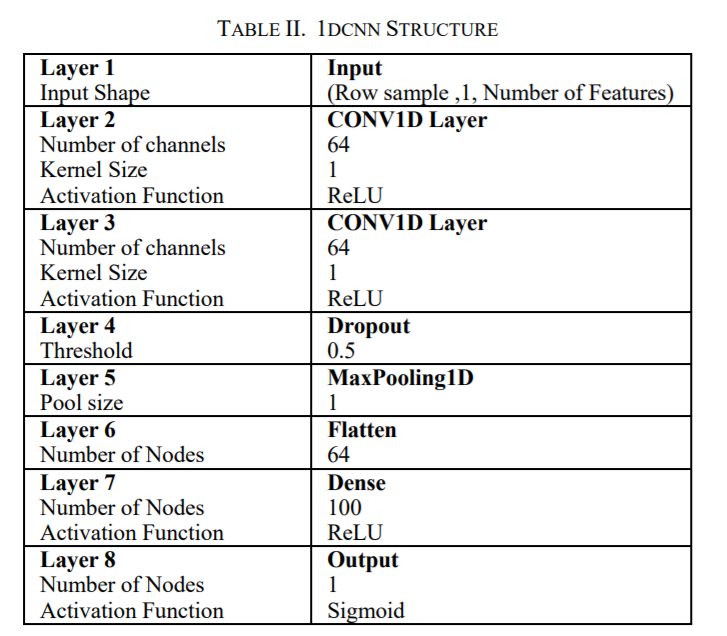

In [ ]:
model_cnn2 = Sequential()
model_cnn2.add(Conv1D(64, (1), activation='relu', input_shape=(X_train.shape[1], 1)))
model_cnn2.add(Conv1D(64, (1), activation='relu'))
model_cnn2.add(Dropout(0.5))
model_cnn2.add(MaxPooling1D(1))
model_cnn2.add(Flatten())
model_cnn2.add(Dense(100, activation='relu'))
model_cnn2.add(Dense(1, activation='sigmoid'))
model_cnn2.compile(optimizer='sgd', loss=tf.keras.losses.binary_crossentropy)
model_cnn2.fit(X_train_cnn, y_train, epochs=20, verbose=1, validation_data = (X_val_cnn, y_val))

Epoch 1/20
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0399 - val_loss: 0.0036
Epoch 2/20
7121/7121 [==============================] - 53s 8ms/step - loss: 0.0040 - val_loss: 0.0028
Epoch 3/20
7121/7121 [==============================] - 53s 7ms/step - loss: 0.0034 - val_loss: 0.0025
Epoch 4/20
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0035 - val_loss: 0.0025
Epoch 5/20
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 6/20
7121/7121 [==============================] - 55s 8ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 7/20
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 8/20
7121/7121 [==============================] - 53s 7ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 9/20
7121/7121 [==============================] - 53s 7ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 10/20
7121/7121 [==============================] - 53s 7ms/step - l

0.9993504441557529


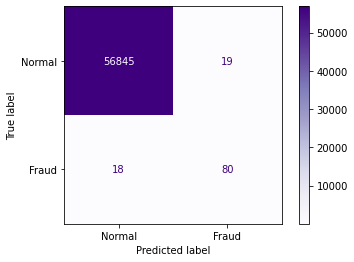

In [ ]:
y_cnn2 = model_cnn2.predict(X_test_cnn).round()
y_cnn2 = np.reshape(y_cnn2, (-1,))
#print(y_cnn2.shape, y_test_cnn.shape)
cnn_accuracy2 = sklearn.metrics.accuracy_score(y_test_cnn,y_cnn2)
print(cnn_accuracy2)
cnn_cm2 = confusion_matrix(y_test, y_cnn2)
matrix = ConfusionMatrixDisplay(cnn_cm2, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# OneClassSVM

In [ ]:
# Пробую сделать SVM oneClassClassifier, которая учится лишь на одном классе 
# Оочень долго обучается, даже при gamma='auto', kernel='linear'. Так и не дождался)
from sklearn.svm import OneClassSVM
X_oc = df.loc[df['Class'] == 0]
y_oc = df.loc[df['Class'] == 0, ['Class']] 
#y_oc['Class'] = 1
X_oc = X_oc.drop(['Class'], axis=1)

X_oc_train, X_oc_test, y_oc_train, y_oc_test = train_test_split(X_oc, y_oc, train_size = 0.8) 
svm_oc = OneClassSVM(gamma='auto', nu=0.001, verbose=1, kernel='linear', tol=0.0001)
svm_oc.fit(X_oc)

y_svm_oc = svm_oc.predict(X_oc_test)
y_svm_oc[y_svm_oc == 1] = 0
y_svm_oc[y_svm_oc == -1] = 1

svm_oc_accuracy = sklearn.metrics.accuracy_score(y_test,y_svm_oc)
print(svm_oc_accuracy)
svm_oc_cm = confusion_matrix(y_oc_test, y_svm_oc)
matrix = ConfusionMatrixDisplay(svm_oc, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

[LibSVM]

# Пробую метод upsamling'a SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import  SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Logreg

0.9741582107369825


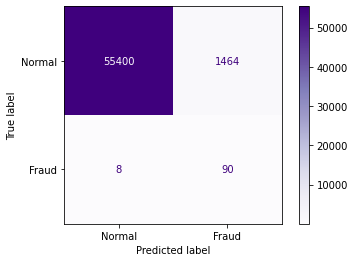

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_smote = LogisticRegression(C=10, random_state=1)
lr_smote.fit(X_train_sm, y_train_sm)
y_lr_smote  = lr_smote.predict(X_test)
lr_accuracy_smote  = sklearn.metrics.accuracy_score(y_test,y_lr_smote )
print(lr_accuracy_smote )
lr_cm_smote  = confusion_matrix(y_test, y_lr_smote)
matrix = ConfusionMatrixDisplay(lr_cm_smote , ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# Random Forest

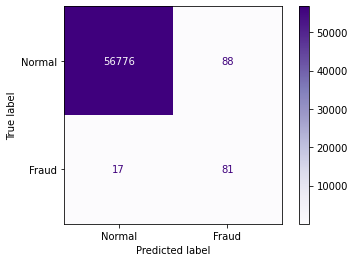

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=12, max_features=10)
rfc.fit(X_train_sm, y_train_sm)
y_rfc_smote = rfc.predict(X_test)

rfc_cm_smote = confusion_matrix(y_test, y_rfc_smote)
matrix = ConfusionMatrixDisplay(rfc_cm_smote, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# XGBoost

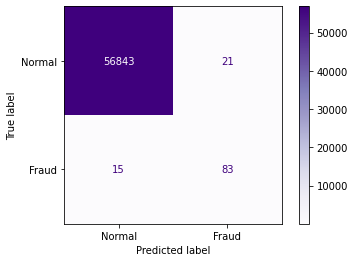

In [ ]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(n_estimators = 100, max_depth = 14, learning_rate = 0.3)
xgbc.fit(np.array(X_train_sm), np.array(y_train_sm))
y_xgb = xgbc.predict(np.array(X_test))

xgb_cm = confusion_matrix(y_test, y_xgb)
matrix = ConfusionMatrixDisplay(xgb_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# LightGBM

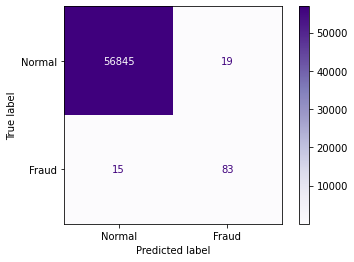

In [ ]:
from lightgbm import LGBMClassifier
lgbc = LGBMClassifier(learning_rate=0.3, max_depth=11, random_state=21, num_leaves=50)

lgbc.fit(np.array(X_train_sm), np.array(y_train_sm))
y_lgb = lgbc.predict(np.array(X_test))

lgb_cm = confusion_matrix(y_test, y_lgb)
matrix = ConfusionMatrixDisplay(lgb_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# CatBoost

In [ ]:
pip install catboost

In [ ]:
import catboost
from catboost import CatBoostClassifier

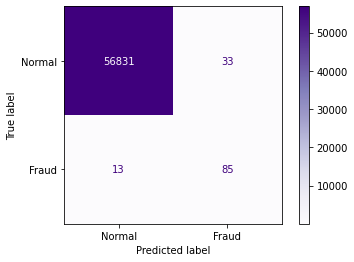

In [ ]:
cbc = CatBoostClassifier(learning_rate=0.3, depth=15, l2_leaf_reg=0.02, iterations=200, verbose=0)
cbc.fit(X_train_sm, y_train_sm)
y_cbc = cbc.predict(X_test)

cbc_cm = confusion_matrix(y_test, y_cbc)
matrix = ConfusionMatrixDisplay(cbc_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# MLP

In [ ]:
tsr_train_sm = tf.convert_to_tensor(X_train_sm)
#tsr_test = tf.convert_to_tensor(X_test)

mlp = Sequential()
mlp.add(tf.keras.Input(shape=(tsr_train_sm.shape[1])))
mlp.add(Dense(56, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
mlp.add(Dropout(0.45))
mlp.add(Dense(20, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
mlp.add(Dense(24, activation='relu', kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics='accuracy')
mlp.fit(tsr_train_sm, y_train_sm, epochs=10, verbose=1, batch_size=32)

Epoch 1/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0817 - accuracy: 0.9721
Epoch 2/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0248 - accuracy: 0.9953
Epoch 3/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0222 - accuracy: 0.9961
Epoch 4/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0207 - accuracy: 0.9964
Epoch 5/10
14216/14216 [==============================] - 27s 2ms/step - loss: 0.0202 - accuracy: 0.9967
Epoch 6/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0199 - accuracy: 0.9967
Epoch 7/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0190 - accuracy: 0.9969
Epoch 8/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0191 - accuracy: 0.9968
Epoch 9/10
14216/14216 [==============================] - 26s 2ms/step - loss: 0.0189 - accuracy: 0.9969
Epoch 10/10
14216/14216 [==============================

0.9973315543695798


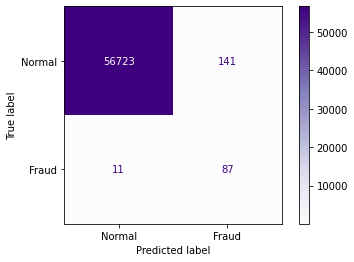

In [ ]:
y_mlp = mlp.predict(X_test).round()
mlp_accuracy = sklearn.metrics.accuracy_score(y_test,y_mlp)
print(mlp_accuracy)
mlp_cm = confusion_matrix(y_test, y_mlp)
matrix = ConfusionMatrixDisplay(mlp_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()

# SVM (SMOTE)

In [ ]:
from sklearn.svm import SVC
sv_smote = SVC(kernel='linear', gamma='auto', tol=0.0001, verbose = 1)
sv_smote.fit(X_train, y_train)
y_svc_smote = sv.predict(X_test)
svc_accuracy_smote = sklearn.metrics.accuracy_score(y_test,y_svc_smote)
print(svc_accuracy_smote)
svc_cm_smote = confusion_matrix(y_test, y_svc)
matrix = ConfusionMatrixDisplay(svc_cm, ['Normal', 'Fraud'])
matrix.plot(cmap='Purples', values_format='d')
plt.show()


[LibSVM]

# Paper implementation metrics

Accuracy, F1 score, precision, recall

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
def print_metrics(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  print("accuracy, f1, precision, recall: ")
  print(accuracy.round(4), '\t', f1.round(3), '\t', precision.round(3), '\t', recall.round(3))
  print("________________________________________________")

In [ ]:
print("DEAL framework:")
print_metrics(y_test, y_ensemble)

DEAL framework:
accuracy, f1, precision, recall: 
0.9996 	 0.873 	 0.952 	 0.806
________________________________________________


In [ ]:
print("CNN:")
print_metrics(y_test, y_cnn)
# Recall = 100% ВАУ! ЛУЧШАЯ МОДЕЛЬ!)))

CNN:
accuracy, f1, precision, recall: 
0.0017 	 0.003 	 0.002 	 1.0
________________________________________________


In [ ]:
print("Logistic Regression")
print_metrics(y_test, y_lr)

Logistic Regression
accuracy, f1, precision, recall: 
0.9994 	 0.816 	 0.816 	 0.816
________________________________________________


In [ ]:
print("SVC:")
print_metrics(y_test, y_svc)

SVC:
accuracy, f1, precision, recall: 
0.9993 	 0.798 	 0.79 	 0.806
________________________________________________


In [ ]:
print("RandomForestClassifier:")
print_metrics(y_test, y_rfc)

RandomForestClassifier:
accuracy, f1, precision, recall: 
0.9996 	 0.88 	 0.942 	 0.827
________________________________________________


In [ ]:
print("Kaggle CNN architecture:")
print_metrics(y_test, y_cnn2)

Kaggle CNN architecture:
accuracy, f1, precision, recall: 
0.9994 	 0.812 	 0.808 	 0.816
________________________________________________


# SMOTE metrics:

In [ ]:
print("Logistic regression smote:")
print_metrics(y_test, y_lr_smote)

Logistic regression:
accuracy, f1, precision, recall: 
0.9742 	 0.109 	 0.058 	 0.918
________________________________________________


In [ ]:
print("Random forest:")
print_metrics(y_test, y_rfc_smote)

Random forest:
accuracy, f1, precision, recall: 
0.9982 	 0.607 	 0.479 	 0.827
________________________________________________


In [ ]:
print("XGB:")
print_metrics(y_test, y_xgb)

XGB:
accuracy, f1, precision, recall: 
0.9994 	 0.822 	 0.798 	 0.847
________________________________________________


In [ ]:
print("LGBM:")
print_metrics(y_test, y_lgb)

LGBM:
accuracy, f1, precision, recall: 
0.9994 	 0.83 	 0.814 	 0.847
________________________________________________


In [ ]:
print("CatBoost:")
print_metrics(y_test, y_cbc)

CatBoost:
accuracy, f1, precision, recall: 
0.9992 	 0.787 	 0.72 	 0.867
________________________________________________


In [ ]:
print("MLP:")
print_metrics(y_test, y_mlp)

MLP:
accuracy, f1, precision, recall: 
0.9973 	 0.534 	 0.382 	 0.888
________________________________________________


# Итог

Для нас важнее всего - recall метрика, уже потом f1. Так как нет ничего страшного в том, что из 50тыс транзакций пару десятков хороших посчитаются за мошеннические, намного страшнее каждая мошенническая транзакция, которую модель не заметила. 

Таким образом лучшими моделями можно считать: smote_mlp, Catboost_smote, LGBM_smote, LogregSmote (Да, там 1500 FalseNegative, но это все еще 3% от всех, что не так уж и велико.)